# Necessary libraries

In [23]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
import pickle

In [24]:
import warnings
warnings.filterwarnings("ignore")

In [25]:
data = pd.read_csv("D:\VS code\car_price_predictor\quikr_car.csv")

In [26]:
df = pd.DataFrame(data)

# Data Understanding

In [27]:
# Display descriptions for each feature.
descriptions = {
    'car_ID': "Unique identifier for each car",
    'symboling': "Insurance risk rating for the car",
    'CarName': "Name or model of the car",
    'fueltype': "Type of fuel used (gas or diesel)",
    'aspiration': "Method of air intake for the engine (std or turbo)",
    'doornumber': "Number of doors on the car",
    'carbody': "Type of car body or design (sedan, hatchback, etc.)",
    'drivewheel': "Type of drivetrain or wheels (FWD, RWD, 4WD)",
    'enginelocation': "Engine location (front or rear)",
    'wheelbase': "Distance between front and rear axles",
    'carlength': "Length of the car",
    'carwidth': "Width of the car",
    'carheight': "Height of the car",
    'curbweight': "Weight of the car without passengers or cargo",
    'enginetype': "Type of engine (ohc, ohcv, etc.)",
    'cylindernumber': "Number of cylinders in the engine",
    'enginesize': "Size of the engine (in cc or ci)",
    'fuelsystem': "Type of fuel injection system (mpfi, etc.)",
    'boreratio': "Ratio of cylinder bore diameter to stroke length",
    'stroke': "Length of the engine stroke",
    'compressionratio': "Engine compression ratio",
    'horsepower': "Engine power output (in hp)",
    'peakrpm': "Engine's peak RPM for generating power",
    'citympg': "Fuel efficiency in city driving (mpg)",
    'highwaympg': "Fuel efficiency on the highway (mpg)",
    'price': "Price of the car"
}

for column in df.columns:
    print(f"{column}: {descriptions.get(column, 'No description available')}")

name: No description available
company: No description available
year: No description available
Price: No description available
kms_driven: No description available
fuel_type: No description available


In [28]:
df.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


In [29]:
# check for missing values
df.isnull().sum()

name           0
company        0
year           0
Price          0
kms_driven    52
fuel_type     55
dtype: int64

####  there is no missing

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


In [31]:
# check for duplicated values
print("Duplicate Values =",df.duplicated().sum())

Duplicate Values = 94


In [32]:
df.describe()

,name,company,year,Price,kms_driven,fuel_type
count,892,892,892,892,840,837
unique,525,48,61,274,258,3
top,Honda City,Maruti,2015,Ask For Price,"45,000 kms",Petrol
freq,13,235,117,35,30,440


In [33]:
df.describe(include='object')

,name,company,year,Price,kms_driven,fuel_type
count,892,892,892,892,840,837
unique,525,48,61,274,258,3
top,Honda City,Maruti,2015,Ask For Price,"45,000 kms",Petrol
freq,13,235,117,35,30,440


# Data Cleaning

In [34]:
df['CarName'].unique()

KeyError: 'CarName'

#### observation : as you can see , it has name of company and car model , i dont like it i just want to have company name

In [ ]:
print(df.columns)


Index(['name', 'company', 'year', 'Price', 'kms_driven', 'fuel_type'], dtype='object')


In [ ]:
print(df.head())



                                     name   company  year          Price  \
0    Hyundai Santro Xing XO eRLX Euro III   Hyundai  2007         80,000   
1                 Mahindra Jeep CL550 MDI  Mahindra  2006       4,25,000   
2              Maruti Suzuki Alto 800 Vxi    Maruti  2018  Ask For Price   
3  Hyundai Grand i10 Magna 1.2 Kappa VTVT   Hyundai  2014       3,25,000   
4        Ford EcoSport Titanium 1.5L TDCi      Ford  2014       5,75,000   

   kms_driven fuel_type  
0  45,000 kms    Petrol  
1      40 kms    Diesel  
2  22,000 kms    Petrol  
3  28,000 kms    Petrol  
4  36,000 kms    Diesel  


In [ ]:
df.insert(1, 'Company', df['name'].str.split(' ').str[0])


In [ ]:
df.drop(columns=['CarName'],inplace=True)

In [ ]:
df.head()

,car_ID,Company,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,alfa-romero,3,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,alfa-romero,3,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,alfa-romero,1,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,audi,2,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,audi,2,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
df['Company'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [ ]:
# let's correct the company names
company_name_mapping = {
    'maxda': 'mazda',
    'Nissan': 'nissan',
    'porcshce': 'porsche',
    'toyouta': 'toyota',
    'vokswagen': 'volkswagen',
    'vw': 'volkswagen'
}

df['Company'].replace(company_name_mapping, inplace=True)

In [ ]:
df['Company'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [ ]:
# ok :)

In [ ]:
# car_ID is not useful column
df.drop(columns=['car_ID'],inplace=True)

# Time to Visualization

#### 1 : Average Car Prices by Company

In [35]:
print(df.head())


                                     name   company  year          Price  \
0    Hyundai Santro Xing XO eRLX Euro III   Hyundai  2007         80,000   
1                 Mahindra Jeep CL550 MDI  Mahindra  2006       4,25,000   
2              Maruti Suzuki Alto 800 Vxi    Maruti  2018  Ask For Price   
3  Hyundai Grand i10 Magna 1.2 Kappa VTVT   Hyundai  2014       3,25,000   
4        Ford EcoSport Titanium 1.5L TDCi      Ford  2014       5,75,000   

   kms_driven fuel_type  
0  45,000 kms    Petrol  
1      40 kms    Diesel  
2  22,000 kms    Petrol  
3  28,000 kms    Petrol  
4  36,000 kms    Diesel  


In [36]:
print(df.columns)


Index(['name', 'company', 'year', 'Price', 'kms_driven', 'fuel_type'], dtype='object')


In [37]:
# Example assuming the column name is 'Price' instead of 'price'
company_prices = df.groupby("Company")["Price"].mean().reset_index()


KeyError: 'Company'

#### 2 : Correlation Heatmap

In [38]:
correlation_matrix = df.corr(numeric_only=True) 

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

ValueError: zero-size array to reduction operation fmin which has no identity

<Figure size 1200x1000 with 0 Axes>

In [ ]:
df['carlength']

0      168.8
1      168.8
2      171.2
3      176.6
4      176.6
       ...  
200    188.8
201    188.8
202    188.8
203    188.8
204    188.8
Name: carlength, Length: 205, dtype: float64

#### 3 : Price VS Categorical columns

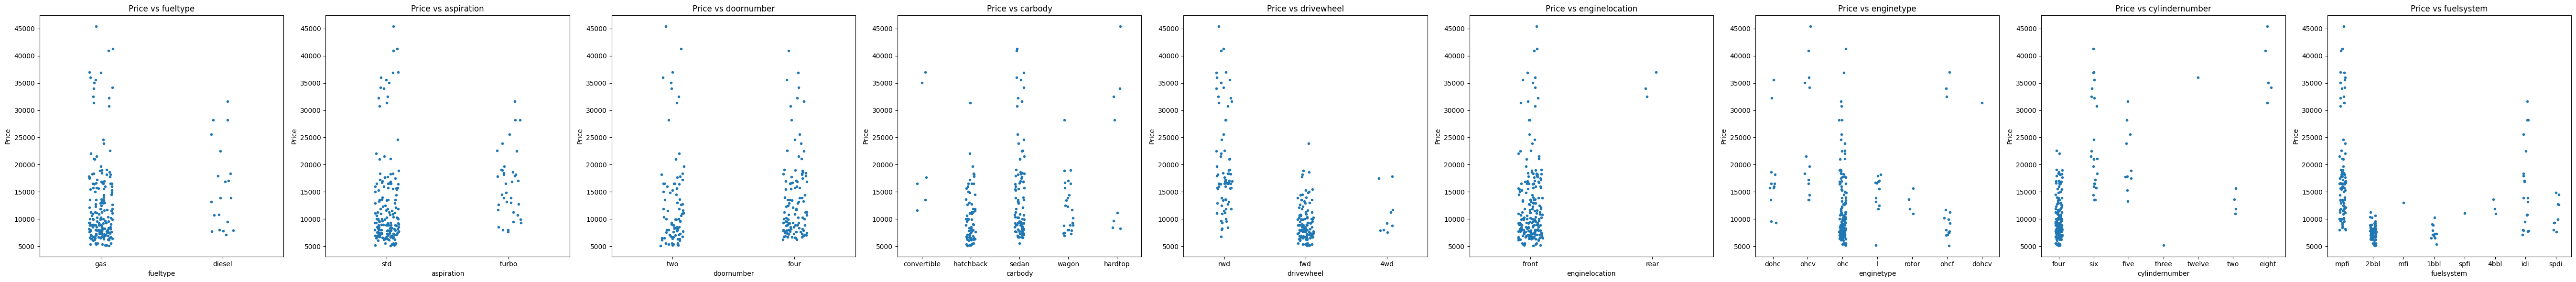

In [ ]:
# Select the categorical columns we want to compare with "price" 
categorical_columns = ["fueltype", "aspiration", "doornumber", "carbody", "drivewheel", "enginelocation", "enginetype", "cylindernumber", "fuelsystem"]

num_cols = len(categorical_columns)
fig, axes = plt.subplots(1, num_cols, figsize=(6 * num_cols, 6))

for i, col in enumerate(categorical_columns):
    sns.stripplot(x=col, y="price", data=df, ax=axes[i], size=4) 
    axes[i].set_title(f"Price vs {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Price")

plt.tight_layout()
plt.show()


###  From the plots above, we can see the distribution of the parameters and their effect on the price ( I think this plot is wonderful )

#### 4 : Price VS Numerical columns

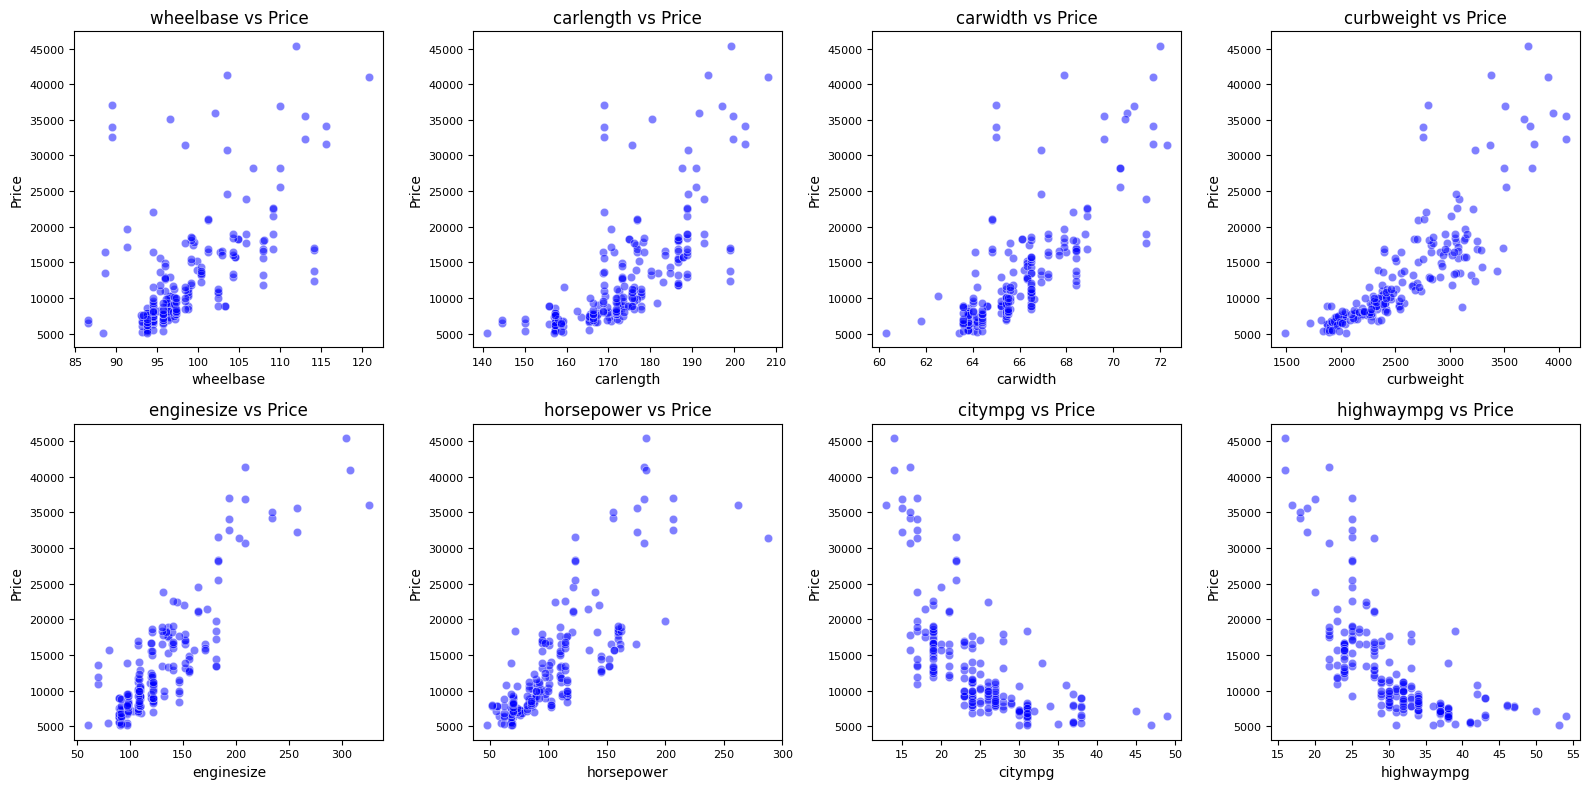

In [ ]:
# Select the numerical columns we want to compare with "price" 
numerical_columns = ["wheelbase", "carlength", "carwidth", "curbweight", "enginesize", "horsepower", "citympg", "highwaympg"]

sns.set_palette("cool")

fig, axes = plt.subplots(2, 4, figsize=(16, 8))
axes = axes.flatten()

for i, col in enumerate(numerical_columns):
    sns.scatterplot(data=df, x=col, y="price", ax=axes[i], alpha=0.5, color="blue")
    axes[i].set_title(f"{col} vs Price", fontsize=12)
    axes[i].set_xlabel(col, fontsize=10)
    axes[i].set_ylabel("Price", fontsize=10)
    axes[i].tick_params(axis="both", labelsize=8)

plt.tight_layout()
plt.show()

### From the graphs above, we can see the distributions and we can see the effect of the features on the price change.

# Preprocessing

In [ ]:
# Drop numerical : symboling, wheelbase,  boreratio, stroke, compressionratio, peakrpm, Company
# Drop categorical : nothing

In [ ]:
df2 = df.drop(columns=['symboling','wheelbase','boreratio','stroke','compressionratio','peakrpm','Company'])

In [ ]:
df2.head(15)

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,horsepower,citympg,highwaympg,price
0,gas,std,two,convertible,rwd,front,168.8,64.1,48.8,2548,dohc,four,130,mpfi,111,21,27,13495.000
1,gas,std,two,convertible,rwd,front,168.8,64.1,48.8,2548,dohc,four,130,mpfi,111,21,27,16500.000
2,gas,std,two,hatchback,rwd,front,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,154,19,26,16500.000
3,gas,std,four,sedan,fwd,front,176.6,66.2,54.3,2337,ohc,four,109,mpfi,102,24,30,13950.000
4,gas,std,four,sedan,4wd,front,176.6,66.4,54.3,2824,ohc,five,136,mpfi,115,18,22,17450.000
5,gas,std,two,sedan,fwd,front,177.3,66.3,53.1,2507,ohc,five,136,mpfi,110,19,25,15250.000
6,gas,std,four,sedan,fwd,front,192.7,71.4,55.7,2844,ohc,five,136,mpfi,110,19,25,17710.000
7,gas,std,four,wagon,fwd,front,192.7,71.4,55.7,2954,ohc,five,136,mpfi,110,19,25,18920.000
8,gas,turbo,four,sedan,fwd,front,192.7,71.4,55.9,3086,ohc,five,131,mpfi,140,17,20,23875.000
9,gas,turbo,two,hatchback,4wd,front,178.2,67.9,52.0,3053,ohc,five,131,mpfi,160,16,22,17859.167


### Convert categorical values to binary columns

In [ ]:
df2 = pd.get_dummies(columns=["fueltype","enginelocation","aspiration","doornumber","carbody","drivewheel","enginetype",
                                "cylindernumber","fuelsystem"],data=df2)

In [ ]:
df2.head(15)

,carlength,carwidth,carheight,curbweight,enginesize,horsepower,citympg,highwaympg,price,fueltype_diesel,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,168.8,64.1,48.8,2548,130,111,21,27,13495.000,False,...,False,False,False,False,False,False,False,True,False,False
1,168.8,64.1,48.8,2548,130,111,21,27,16500.000,False,...,False,False,False,False,False,False,False,True,False,False
2,171.2,65.5,52.4,2823,152,154,19,26,16500.000,False,...,False,False,False,False,False,False,False,True,False,False
3,176.6,66.2,54.3,2337,109,102,24,30,13950.000,False,...,False,False,False,False,False,False,False,True,False,False
4,176.6,66.4,54.3,2824,136,115,18,22,17450.000,False,...,False,False,False,False,False,False,False,True,False,False
5,177.3,66.3,53.1,2507,136,110,19,25,15250.000,False,...,False,False,False,False,False,False,False,True,False,False
6,192.7,71.4,55.7,2844,136,110,19,25,17710.000,False,...,False,False,False,False,False,False,False,True,False,False
7,192.7,71.4,55.7,2954,136,110,19,25,18920.000,False,...,False,False,False,False,False,False,False,True,False,False
8,192.7,71.4,55.9,3086,131,140,17,20,23875.000,False,...,False,False,False,False,False,False,False,True,False,False
9,178.2,67.9,52.0,3053,131,160,16,22,17859.167,False,...,False,False,False,False,False,False,False,True,False,False


In [ ]:
# Done

# Normalize

In [ ]:
scaler = StandardScaler()

In [ ]:
numerical_columns = df2.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_columns.remove('price')

In [ ]:
numerical_columns

['carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'horsepower',
 'citympg',
 'highwaympg']

In [ ]:
df2[numerical_columns] = scaler.fit_transform(df2[numerical_columns])

# Modeling

In [ ]:
X = df2.drop(columns=['price'])
y = df2['price'].values.reshape(-1,1)

In [ ]:
X.shape

(205, 46)

In [ ]:
y.shape

(205, 1)

In [ ]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
pickle.dump(scaler,open('scaling.pkl','wb'))

In [ ]:
X_train

,carlength,carwidth,carheight,curbweight,enginesize,horsepower,citympg,highwaympg,fueltype_diesel,fueltype_gas,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
66,0.077250,0.089812,0.276967,0.278074,0.170739,-0.814171,0.885740,1.200761,True,False,...,False,False,False,False,False,True,False,False,False,False
111,1.027916,1.164596,1.220535,1.000049,-0.166277,-0.231119,-0.953012,-0.982764,False,True,...,False,False,False,False,False,False,False,True,False,False
153,-0.353393,-1.078431,2.205129,-0.530538,-0.840310,-1.067671,0.885740,0.909625,False,True,...,False,False,False,True,False,False,False,False,False,False
96,-0.710909,-0.984972,0.317992,-1.125445,-0.719947,-0.890221,0.885740,0.909625,False,True,...,False,False,False,True,False,False,False,False,False,False
38,-0.532151,-0.330755,-0.174305,-0.513210,-0.407003,-0.459269,0.272823,0.327351,False,True,...,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.361638,0.930947,-1.651195,1.123266,1.302152,1.416637,-0.953012,-0.837195,False,True,...,False,False,False,False,False,False,False,True,False,False
14,1.214799,0.463650,0.810288,0.961544,0.892917,0.427984,-0.799782,-0.837195,False,True,...,False,False,False,False,False,False,False,True,False,False
92,-0.710909,-0.984972,0.317992,-1.188979,-0.719947,-0.890221,0.885740,0.909625,False,True,...,False,False,False,True,False,False,False,False,False,False
179,0.767905,0.837488,-0.707626,0.886458,1.061426,1.441987,-0.953012,-0.982764,False,True,...,False,False,False,False,False,False,False,True,False,False


## Regressions

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

# Reshape the target variables to 1D arrays
y_train = y_train.ravel()
y_test = y_test.ravel()

# Create a list of regression models to evaluate
regression_models = [
    LinearRegression(),
    DecisionTreeRegressor(),
    RandomForestRegressor(n_estimators=100),
    SVR(),
    KNeighborsRegressor()
]

training_scores = []
testing_scores = []

def model_prediction(model, x_train, y_train, x_test, y_test):
    model.fit(x_train, y_train)
    x_train_pred = model.predict(x_train)
    x_test_pred = model.predict(x_test)
    a = r2_score(y_train, x_train_pred) * 100
    b = r2_score(y_test, x_test_pred) * 100
    training_scores.append(a)
    testing_scores.append(b)
    
    print(f"R2 Score of {type(model).__name__} model on Training Data: {a:.2f}")
    print(f"R2 Score of {type(model).__name__} model on Testing Data: {b:.2f}")

for model in regression_models:
    print(f"Evaluating {type(model).__name__} model : ")
    model_prediction(model, X_train, y_train, X_test, y_test)
    print("\n")

best_model_index = testing_scores.index(max(testing_scores))
best_model = regression_models[best_model_index]
best_test_score = testing_scores[best_model_index]

print(f"The best model is {type(best_model).__name__} with an R2 score of {best_test_score:.2f} on the testing data.")


Evaluating LinearRegression model : 
R2 Score of LinearRegression model on Training Data: 93.40
R2 Score of LinearRegression model on Testing Data: 87.48


Evaluating DecisionTreeRegressor model : 
R2 Score of DecisionTreeRegressor model on Training Data: 99.87
R2 Score of DecisionTreeRegressor model on Testing Data: 89.23


Evaluating RandomForestRegressor model : 
R2 Score of RandomForestRegressor model on Training Data: 98.54
R2 Score of RandomForestRegressor model on Testing Data: 95.62


Evaluating SVR model : 
R2 Score of SVR model on Training Data: -10.71
R2 Score of SVR model on Testing Data: -9.89


Evaluating KNeighborsRegressor model : 
R2 Score of KNeighborsRegressor model on Training Data: 90.63
R2 Score of KNeighborsRegressor model on Testing Data: 78.27


The best model is RandomForestRegressor with an R2 score of 95.62 on the testing data.


In [ ]:
# Access to model
RandomForestRegressor = regression_models[2]

# Pickling the model file for deployment

In [ ]:
pickle.dump(RandomForestRegressor,open('RFRegressorModel.pkl','wb'))

In [ ]:
pickled_model = pickle.load(open('RFRegressorModel.pkl','rb'))

In [ ]:
row_to_predict = X_test.iloc[1]

In [ ]:
# Prediction
prediction = pickled_model.predict([row_to_predict])

In [ ]:
prediction

array([18275.08])